In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mode
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed
import multiprocessing
import matplotlib
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sn


from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense

%matplotlib inline



plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
data=pd.read_csv("19/train.csv",header=None)

In [3]:
Y_train=np.zeros((len(data),3))
data=data.to_numpy()


X_train=data[:,0:2]
labels =data[:,2].astype(int)

for i in range(len(data)):
    Y_train[i,labels[i]]=1


In [4]:
# define the architecture of the network
np.random.seed(42)

model = Sequential()
model.add(Dense(50, input_dim=2,kernel_initializer="uniform", activation='relu'))
model.add(Dense(50, activation='relu', kernel_initializer="uniform"))
# model.add(Dense(50, activation='relu', kernel_initializer="uniform"))
model.add(Dense(3, activation='softmax'))


# train the model using SGD
print("[INFO] compiling model...")

# compile the keras model

# sgd = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])


# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=100, batch_size=1,verbose=1)


# evaluate the keras model
loss, accuracy = model.evaluate(X_train, Y_train,batch_size=1,verbose=1)
print("\n\n [INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))





[INFO] compiling model...
Epoch 1/100
600/600 [==============================] - 0s 725us/step - loss: 0.8668 - accuracy: 0.5433
Epoch 2/100
600/600 [==============================] - 0s 747us/step - loss: 0.6887 - accuracy: 0.6183
Epoch 3/100
600/600 [==============================] - 0s 733us/step - loss: 0.5975 - accuracy: 0.6650
Epoch 4/100
600/600 [==============================] - 0s 775us/step - loss: 0.4905 - accuracy: 0.76170s - loss: 0.4875 - accuracy: 0.
Epoch 5/100
600/600 [==============================] - 0s 799us/step - loss: 0.3820 - accuracy: 0.8583
Epoch 6/100
600/600 [==============================] - 0s 791us/step - loss: 0.2954 - accuracy: 0.8983
Epoch 7/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2338 - accuracy: 0.9217
Epoch 8/100
600/600 [==============================] - 1s 1ms/step - loss: 0.1864 - accuracy: 0.9483
Epoch 9/100
600/600 [==============================] - 1s 1ms/step - loss: 0.1554 - accuracy: 0.9583
Epoch 10/100
600/600 

In [5]:
data=pd.read_csv("19/dev.csv",header=None)

X_valid=data.loc[np.r_[0:15, 30:45, 60:75],:]
X_valid=X_valid.to_numpy()
labels_valid=X_valid[:,-1].astype(int)
X_valid=X_valid[:,0:2]


X_test=data.loc[np.r_[15:30, 45:60, 75:90],:]
X_test=X_test.to_numpy()
labels_test=X_test[:,-1].astype(int)
X_test=X_test[:,0:2]






Y_valid=np.zeros((len(X_valid),3))
Y_test=np.zeros((len(X_test),3))


for i in range(len(X_valid)):
    Y_valid[i,labels_valid[i]]=1

    
for i in range(len(X_test)):
    Y_test[i,labels_test[i]]=1


In [6]:
loss, accuracy = model.evaluate(X_valid, Y_valid,batch_size=1,verbose=1)
print("\n\n [INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

45/45 [==============================] - 0s 1ms/step - loss: 6.1958e-04 - accuracy: 1.0000


 [INFO] loss=0.0006, accuracy: 100.0000%


In [7]:
loss, accuracy = model.evaluate(X_test, Y_test,batch_size=1,verbose=1)
print("\n\n [INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

45/45 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000


 [INFO] loss=0.0029, accuracy: 100.0000%


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________


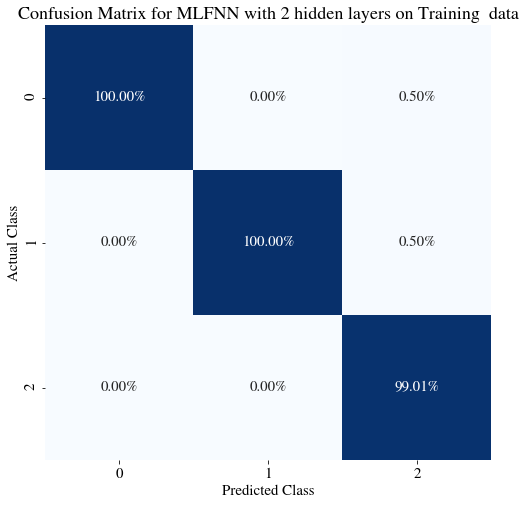

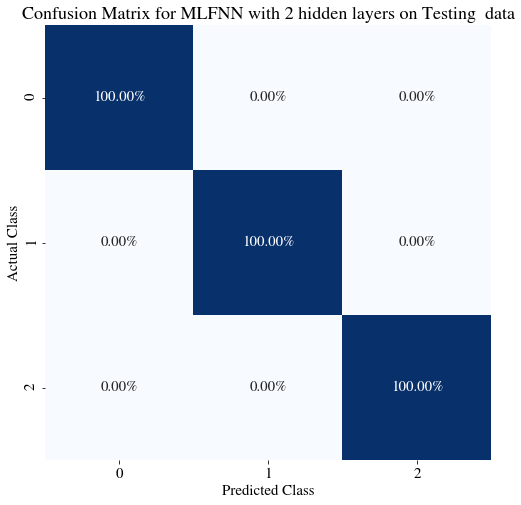

In [9]:
predicted_train =np.argmax(model.predict(X_train), axis=-1)
confuse=confusion_matrix(labels,predicted_train)

sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
    fmt='.2%', cmap='Blues',cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel("Actual Class")
plt.title('Confusion Matrix for MLFNN with 2 hidden layers on Training  data')
plt.savefig("MLFNN_Confusion_1.png")

plt.show()

predicted_test =np.argmax(model.predict(X_test), axis=-1)
confuse=confusion_matrix(labels_test,predicted_test)

sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
    fmt='.2%', cmap='Blues',cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel("Actual Class")
plt.title('Confusion Matrix for MLFNN with 2 hidden layers on Testing  data')
plt.savefig("MLFNN_Confusion_2.png")

plt.show()




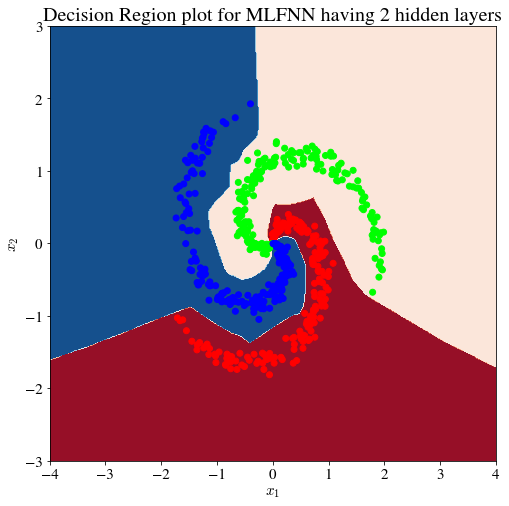

In [10]:
x1=np.linspace(-4,4,num=400)
x2=np.linspace(-3,3,num=400)
xx1, xx2 = np.meshgrid(x1, x2)
r1, r2 = xx1.flatten(), xx2.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))


predicted=np.argmax(model.predict(grid),axis=1)


predicted=predicted.reshape(xx1.shape)
fig = plt.figure(figsize=(8,8))
plt.contourf(xx1, xx2, predicted, cmap='RdBu')
colors = ['red','red','red']
plt.scatter(X_train[:,0], X_train[:,1], c= Y_train, cmap=matplotlib.colors.ListedColormap(colors))


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision Region plot for MLFNN having 2 hidden layers',fontsize=20)

"""recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,unique,loc=4)
"""

plt.savefig('MLFNN_Decision.png')
plt.show()
plt.close()